In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

In [4]:
customer_data = pd.read_csv("data/Mall_Customers.csv")
X = customer_data[['Annual_Income_(k$)', 'Spending_Score']].values

In [16]:
distortions = []
sil_scores = []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    
    distortions.append(kmeans.inertia_)  
    sil_scores.append(silhouette_score(X,kmeans.labels_))

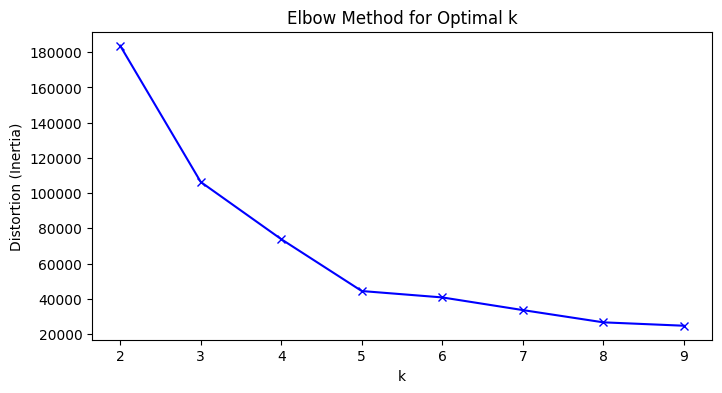

In [17]:
plt.figure(figsize=(8,4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.show()

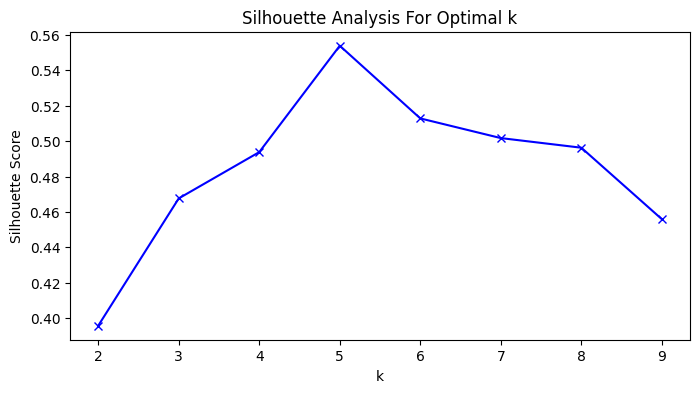

In [18]:
plt.figure(figsize=(8,4))
plt.plot(K, sil_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis For Optimal k')
plt.show()

In [19]:
best_k = K[np.argmax(sil_scores)]
print(f"✅ Optimal number of clusters (k) = {best_k}")

✅ Optimal number of clusters (k) = 5


In [20]:
final_model = KMeans(n_clusters=best_k, random_state=42)
customer_data['Cluster'] = final_model.fit_predict(
    customer_data[['Annual_Income_(k$)', 'Spending_Score']]
)

<Axes: xlabel='Annual_Income_(k$)', ylabel='Spending_Score'>

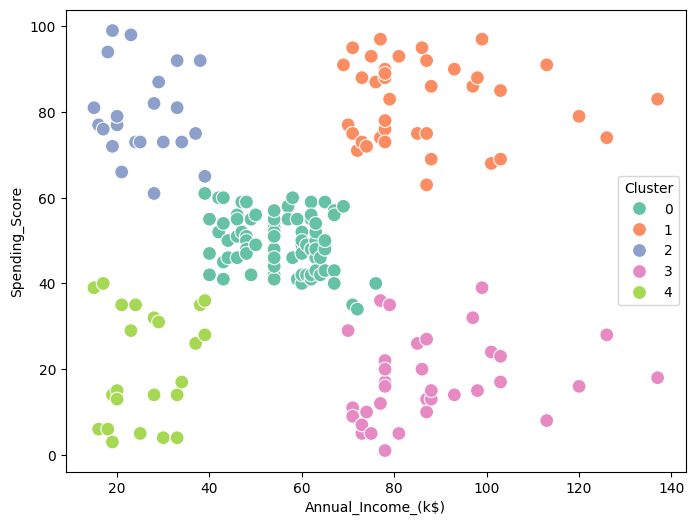

In [21]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Annual_Income_(k$)',
    y='Spending_Score',
    hue='Cluster',
    palette='Set2',
    data=customer_data,
    s=100
)

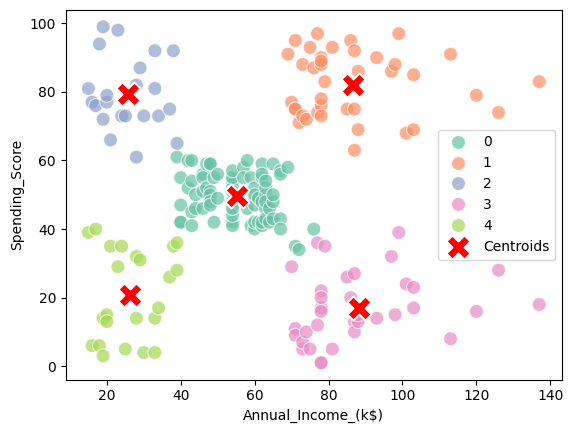

In [25]:
sns.scatterplot(
    x='Annual_Income_(k$)',
    y='Spending_Score',
    hue='Cluster',
    palette='Set2',
    data=customer_data,
    s=100,
    alpha=0.7
)

sns.scatterplot(
    x=final_model.cluster_centers_[:, 0],
    y=final_model.cluster_centers_[:, 1],
    color='red',
    s=300,
    marker='X',
    label='Centroids'
)

plt.show()